In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("exams.csv")
data=df.copy()

data
df

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [23]:
# data["exam_1"] = (data["exam_1"]-data["exam_1"].min())/data["exam_1"].std()
# data["exam_2"] = (data["exam_2"]-data["exam_2"].mean())/data["exam_2"].std()
def do_min_max_normalize(data,col):
    data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())

def do_z_score_normalize(data,col):
    data[col] = (data[col]-data[col].mean())/data[col].std()

do_min_max_normalize(data,"exam_1")
do_min_max_normalize(data,"exam_2")
data

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


In [25]:
x0=np.ones(len(data))

In [26]:
X=np.array([x0,data["exam_1"],data["exam_2"]])
Y=data["admitted"]
W=np.array([0,1,2])
X=X.T

In [39]:
def sigmoid(X,W):
    z=np.dot(X,W)
    return 1/(1+np.e**-z)
Z=sigmoid(X,W)

Iteration 0
0.6255604816183553
Iteration 1000
0.34801080928232886
Iteration 2000
0.29426881687642426
Iteration 3000
0.2684450718871859
Iteration 4000
0.2531353503451931
Iteration 5000
0.24298402793609283
Iteration 6000
0.23576810344596197
Iteration 7000
0.23038994833009635
Iteration 8000
0.22624167580137797
Iteration 9000
0.22295790919085184
Iteration 10000
0.22030513626343118


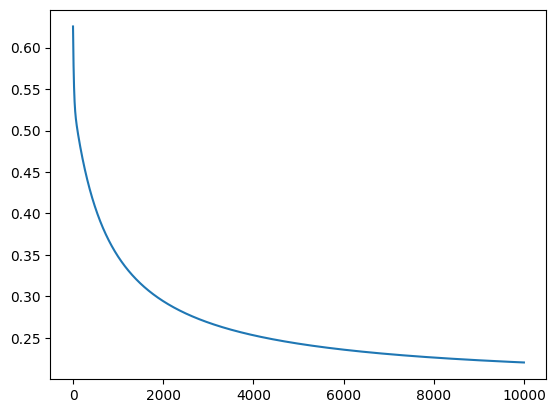

In [28]:
def gradientDescent(X,Y,W,alpha=0.1,iteration=10_000):
    costH=[]
    for i in range(iteration+1):
        
        H=sigmoid(X,W)
        g = np.dot(X.T,H-Y)/len(Y)
        W=W-alpha*g
        
        J = (-Y*np.log(H)-(1-Y)*np.log(1-H)).mean()
        costH.append(J)
      
        if i%1000==0:
            print(f"Iteration {i}")
            print(J)
    return costH,W

costH,Wn = gradientDescent(X,Y,W.copy())

plt.plot(costH)

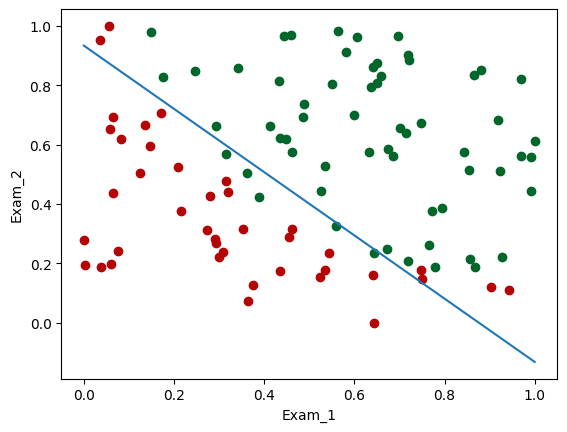

In [29]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")

plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]

yline=-(Wn[0] + np.dot(Wn[1],xline))/Wn[2]
plt.plot(xline,yline)


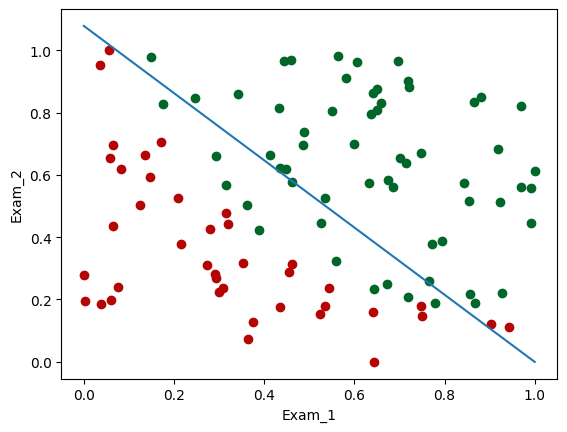

In [12]:
plt.ylabel("Exam_2")
plt.xlabel("Exam_1")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_1"].min(),data["exam_1"].max()]
yline=(1-(Wn[0] + np.dot(Wn[1],xline)))/Wn[2]

plt.plot(xline,yline)

[0.0, 1.0]

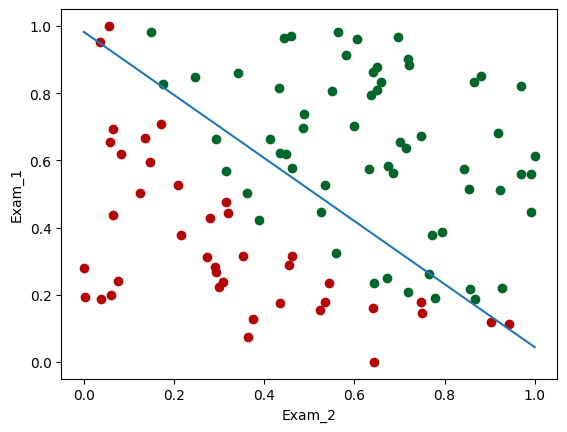

In [53]:
plt.ylabel("Exam_1")
plt.xlabel("Exam_2")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_2"].min(),data["exam_2"].max()]
yline=(1-(Wn[0] + np.dot(Wn[2],xline)))/Wn[1]

plt.plot(xline,yline)
xline

array([ 0.87608465, -0.0621925 ])

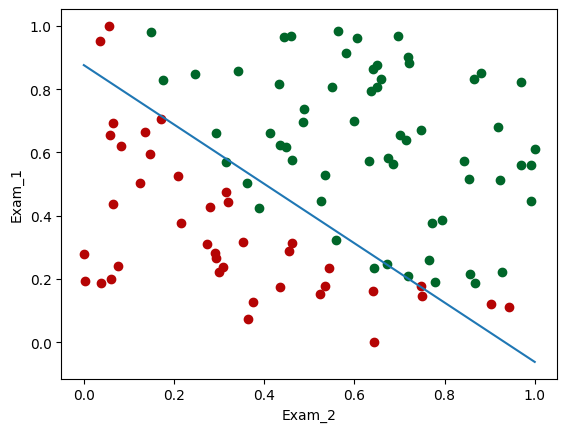

In [54]:
plt.ylabel("Exam_1")
plt.xlabel("Exam_2")

plt.scatter(data[data["admitted"]==1]["exam_1"],data[data["admitted"]==1]["exam_2"],color="#006629")
plt.scatter(data[data["admitted"]==0]["exam_1"],data[data["admitted"]==0]["exam_2"],color="#b50404")

xline=[data["exam_2"].min(),data["exam_2"].max()]
yline=(-(Wn[0] + np.dot(Wn[2],xline)))/Wn[1]

plt.plot(xline,yline)
yline

In [55]:
Z=sigmoid(X,Wn)
p=Z.copy()
p[p<0.5]=0
p[p>=0.5]=1
compareDf=pd.DataFrame(p)
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [50]:
compareDf.columns=["Predict"]

In [51]:
compareDf["Admitted"]=Y.copy()

In [52]:
accuracy = len(compareDf[compareDf["Predict"]==compareDf["Admitted"]])/len(compareDf)
accuracy

0.89

In [ ]:
data.iloc[0:,0]

In [ ]:
data

In [ ]:
data[data["admitted"]==1].iloc[0:,0]

In [ ]:
np.array([np.ones(len(data)),*np.array(data[["exam_1","exam_2"]]).T])==X

In [ ]:
X